In [ ]:
!pip install tensorflow-addons==0.16.1
!pip install pydot
!pip install graphviz


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import seaborn as sns
import os

In [ ]:
# # To import data file

# from google.colab import files
# import zipfile
# import io

# uploaded = files.upload()

# uploaded_filename = "test_data.zip"
# with zipfile.ZipFile(uploaded_filename, 'r') as zip_ref:
#     zip_ref.extractall(".")


Saving test_data.zip to test_data (1).zip


In [ ]:
folder_path = "."                     # Opens current directory.
contents = os.listdir(folder_path)    # Gives list of folder in the directory
print(contents)

['.config', 'test_data', 'model4.keras', 'model5.keras', 'model2.keras', 'test_data.zip', 'model3.keras', 'model1.keras', 'test_data (1).zip', 'sample_data']


In [ ]:
# Define a function to extract data
def read_data(filename):

    data = []
    with open(filename, 'r') as f:
        for line in f:

            # Split the line by spaces and convert each value to float
            line_data = [float(value) for value in line.strip().split()]
            data.append(line_data)
    return data

In [ ]:
# Displacement data set
# Input data
diplacement_list=[]
for i in range(0,200):
    file_path = os.path.join(folder_path, "test_data", f'displacement ({i})')               # Calling file displacement data
    data=read_data(file_path)



    diplacement_list.append(data)

displacement_array = np.array(diplacement_list)
#displacement_array=displacement.reshape(1000,1681)
print(displacement_array.shape)

(200, 1681, 1)


In [ ]:
# print(displacement_array.shape)
# print('displacement:',displacement_array[0,:,:])

In [ ]:
# Property data set
# Labels

prop_list=[]

for i in range(0,200):
    file_path = os.path.join(folder_path, "test_data", f'prop.dat ({i})')               # Calling file prop.dat data
    data=read_data(file_path)



    prop_list.append(data[1:401])

prop_array=np.array(prop_list)
#prop_array=prop.reshape(1000,400)

print(prop_array.shape)

(200, 400, 1)


In [ ]:
# Min-Max Scaling
def min_max_scaling(data):
   scaled_data=np.zeros((len(data[:,0,0]),len(data[0,:,0]),1))
   for i in range(0,len(data[:,0,0])):
       min_val = np.min(data[i,:,:])
       max_val = np.max(data[i,:,:])
       for j in range(0,len(data[0,:,0])):

           scaled_data[i,j,:] = (data[i,j,:] - min_val) / (max_val - min_val)
   return scaled_data

In [ ]:
# Normalize input data
#x_train_scaled = min_max_scaling(displacement_array)
x_test_scaled = min_max_scaling(displacement_array)

# Normalize output data
#y_train_scaled = min_max_scaling(prop_array)
y_test_scaled = min_max_scaling(prop_array)
y_test_shape= y_test_scaled.reshape(200,400)

In [ ]:
def model_test(model_name):
    new_model = tf.keras.models.load_model(model_name)
    new_model.summary()


    #model prediction on test set
    y_pred_test = new_model.predict(x_test_scaled)


    y_true = y_test_shape.flatten()
    y_pred = y_pred_test.flatten()


    threshold = 0.5

    # Convert continuous predictions to binary predictions based on the threshold
    y_pred_binary = (y_pred > threshold).astype(int)


    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    print("Confusion Matrix:")
    print(conf_matrix)


    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    print("Accuracy:", accuracy)

    classes=[0,1]

    con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_binary).numpy()
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

    con_mat_df = pd.DataFrame(con_mat_norm,index = classes,
                     columns = classes)

    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 8)                 13456     
                                                                 
 dense_2 (Dense)             (None, 256)               2304      
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 400)               51600     
                                                                 
Total params: 100256 (391.62 KB)
Trainable params: 100256 (391.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
[[  665  8162]
 [  287 70886]]
Accuracy: 0.8943875


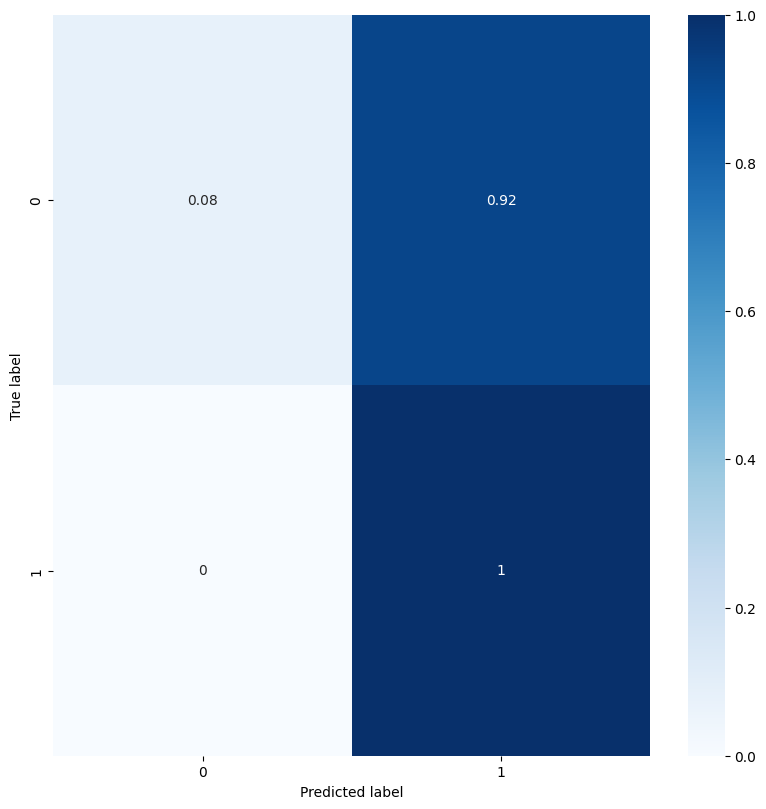

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 8)                 13456     
                                                                 
 dense_4 (Dense)             (None, 256)               2304      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 400)               51600     
                                                                 
Total params: 100256 (391.62 KB)
Trainable params: 100256 (391.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
[[  791  8036]
 [  430 70743]]
Accuracy: 0.894175


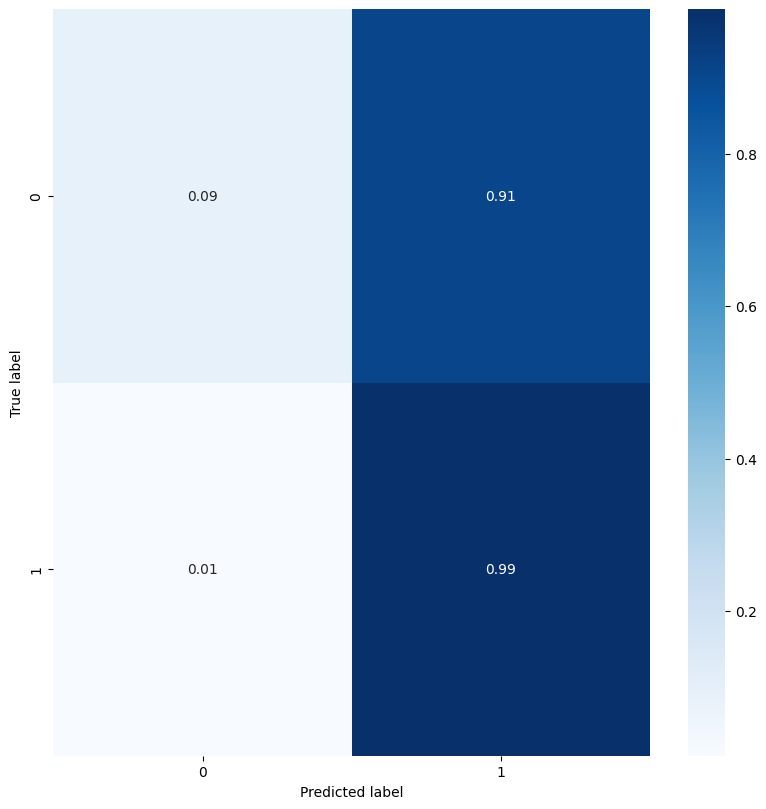

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                107648    
                                                                 
 hidden_2 (Dense)            (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 400)               51600     
                                                                 
Total params: 233488 (912.06 KB)
Trainable params: 233488 (912.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
7/7 [=========

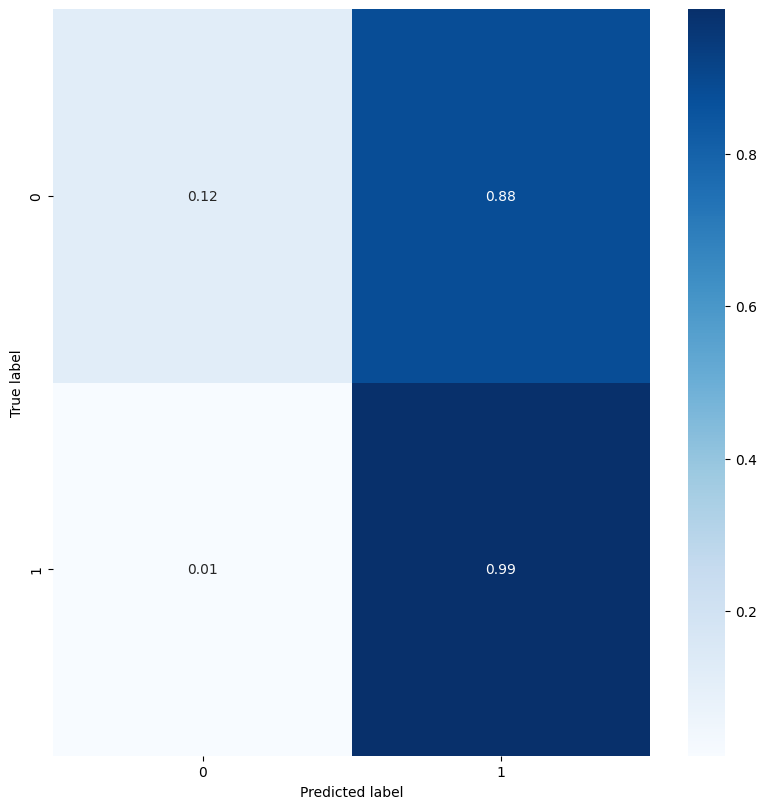

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 8)                 13456     
                                                                 
 hidden_2 (Dense)            (None, 128)               1152      
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)              

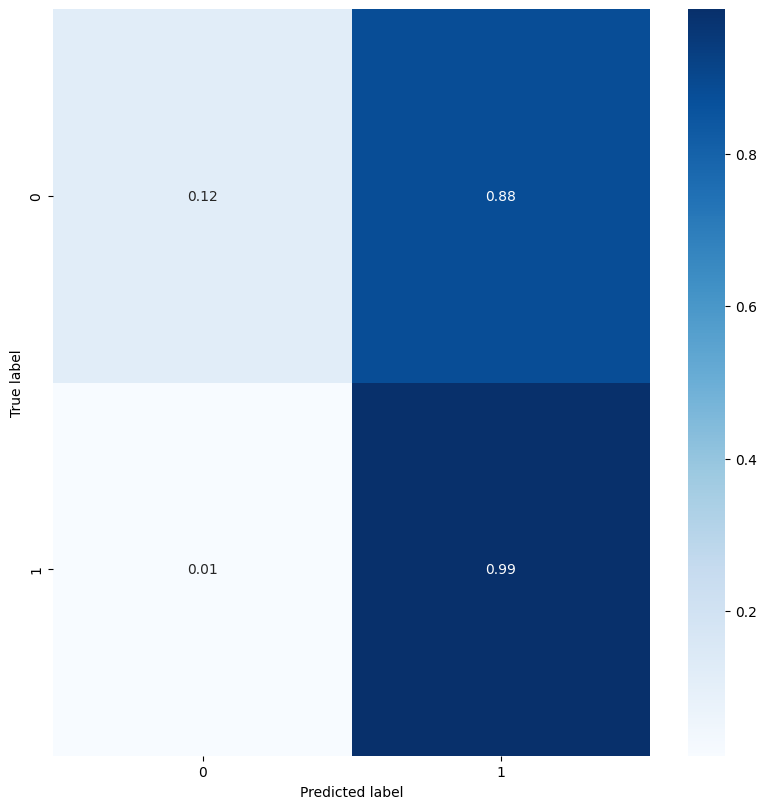

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 8)                 13456     
                                                                 
 hidden_2 (Dense)            (None, 128)               1152      
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                                 
 dense_19 (Dense)            (None, 1024)              525312    
                                                                 
 dense_20 (Dense)            (None, 512)               524800    
                                                                 
 dense_21 (Dense)            (None, 256)              

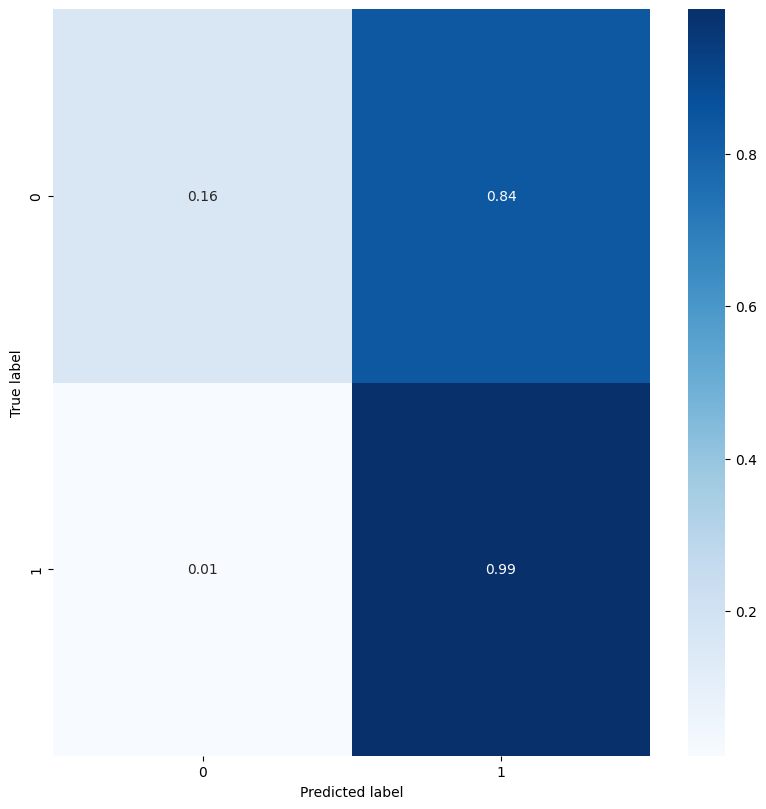

In [ ]:
for i in range(1,6):
    model_test(f'model{i}.keras')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 1679, 8)           32        
                                                                 
 conv1d_6 (Conv1D)           (None, 1677, 32)          800       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 838, 32)           0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 26816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3432576   
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                      

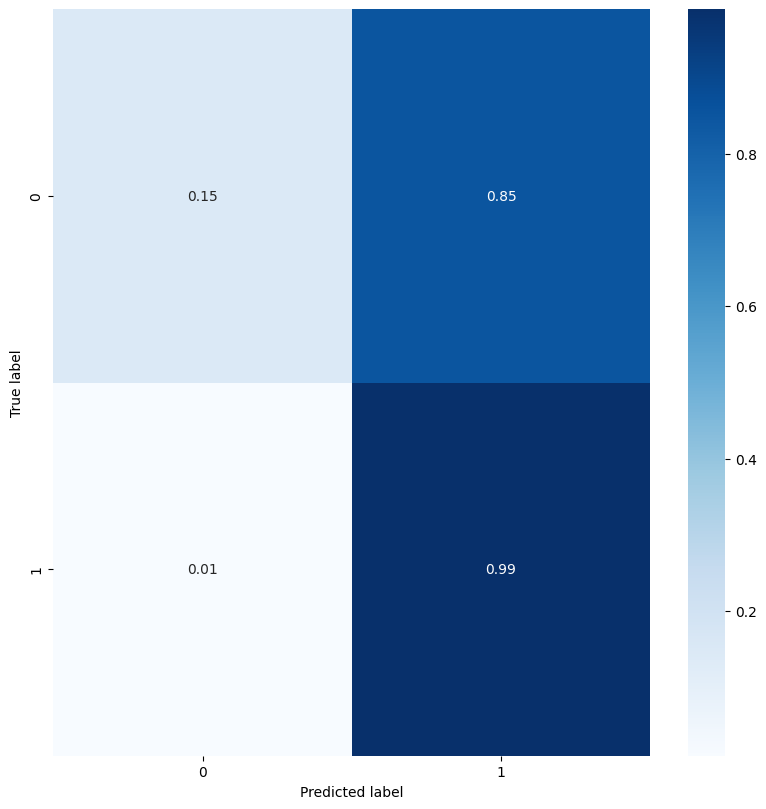

In [ ]:
model_test('model_cnn_v1.keras')

In [ ]:
# y_binary=(y_pred_test[1,:] > threshold).astype(int)
# zero_positions_pred = np.where(y_binary== 0)[0]
# zero_positions_pred.shape
# zero_positions_test= np.where(y_test_shape[1,:]== 0)[0]
# zero_positions_test